<a href="https://colab.research.google.com/github/waqaskhaan/Machine-learning-tasks-Prodigy-InfoTech/blob/main/Internship%20task%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python-headless scikit-learn


In [11]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [13]:
from google.colab import files
uploaded = files.upload()


Saving hand-gesture-recognition-dataset.zip to hand-gesture-recognition-dataset (1).zip


In [15]:
import zipfile
with zipfile.ZipFile('hand-gesture-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('hand-gesture-recognition-dataset')


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    'dataset/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    'dataset/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 14400 images belonging to 1 classes.
Found 3600 images belonging to 1 classes.


In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored

450/450 ━━━━━━━━━━━━━━━━━━━━ 970s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 876s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 898s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 888s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 893s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 869s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 850s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 873s 2s/step

In [19]:
loss, accuracy = model.evaluate(val_data)
print(f'Validation Accuracy: {accuracy*100:.2f}%')


113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 493ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 100.00%


In [20]:
model.save('hand_gesture_model.h5')


In [23]:
def prepare_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    img = cv2.resize(img, (150, 150))
    img = img.astype('float32') / 255
    img = np.expand_dims(img, axis=0)
    return img

image_path = 'path_to_new_image.jpg'
try:
    prepared_image = prepare_image(image_path)
    prediction = model.predict(prepared_image)
    predicted_class = np.argmax(prediction)
    print(f'Predicted Class: {predicted_class}')
except ValueError as e:
    print(e)


Image at path path_to_new_image.jpg could not be loaded.


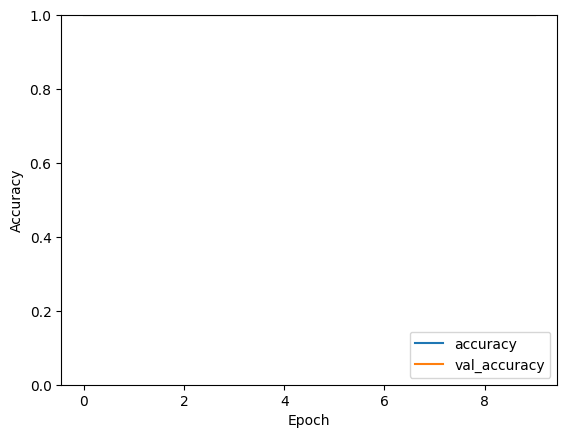

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
